## This is simple non LLM based workflow

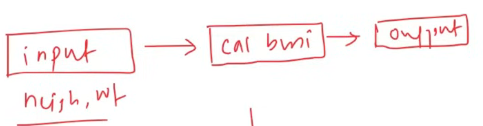

3 state(key,value) pairs : 

1. Weight
2. Height
3. bmi

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
# define state

class BMIState(TypedDict):
    
    weight_kg : float
    height_m : float
    bmi: float
    category : str
    

In [3]:
# define graph
graph = StateGraph(BMIState)


In [4]:
# python ftn which will be the node in the graph
def calculate_bmi(state : BMIState) -> BMIState: # node will graph's state as input
    weight = state['weight_kg']
    height = state['height_m']
    
    bmi = weight / (height**2)
    
    state['bmi'] = round(bmi, 2) # update bmi value in state
    
    return state
    
    

In [5]:
def label_bmi(state: BMIState) -> BMIState:
    
    bmi = state['bmi']
    
    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state

In [6]:
# add nodes to your graph
# we only need 1 node to calculate bmi
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('label_bmi', label_bmi)

#### edges : 


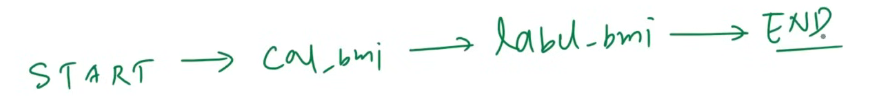

In [7]:
# add edges to the graph
graph.add_edge(START,'calculate_bmi')

graph.add_edge('calculate_bmi', 'label_bmi')

graph.add_edge('label_bmi', END)


# compile the graph
workflow = graph.compile()

In [8]:
# execute the graph

initial_state = {'weight_kg':80, 'height_m':1.73}


final_state = workflow.invoke(initial_state)

print(final_state)


{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


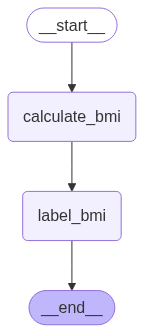

In [9]:
# view the graph

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())